In [1]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv')
df.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [3]:
df=df.head(100)

In [4]:
y= df['Sentiment']


In [5]:
y

0     positive
1     positive
2     positive
3     positive
4     positive
        ...   
95    positive
96    positive
97    positive
98    positive
99    positive
Name: Sentiment, Length: 100, dtype: object

In [6]:
X= df.drop(['Sentiment', 'Topic', 'TweetId', 'TweetDate'], axis=1)

In [7]:
X

,TweetText
0,Now all @Apple has to do is get swype on the i...
1,@Apple will be adding more carrier support to ...
2,Hilarious @youtube video - guy does a duet wit...
3,@RIM you made it too easy for me to switch to ...
4,I just realized that the reason I got into twi...
...,...
95,I must admit @apple has made me a very happy c...
96,"Day305, I'm thankful for the great customer se..."
97,S/O to @apple for replacing my phone for free
98,Loving the new iPod update @apple


In [8]:
X.rename(columns={'TweetText':'Tweets'}, inplace=True)

In [9]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [10]:
X['Tweets']= X['Tweets'].apply(cleanTxt)

In [11]:
X

,Tweets
0,Now all has to do is get swype on the iphone ...
1,will be adding more carrier support to the iP...
2,Hilarious video - guy does a duet with 's Si...
3,you made it too easy for me to switch to iPh...
4,I just realized that the reason I got into twi...
...,...
95,I must admit has made me a very happy camper!...
96,"Day305, I'm thankful for the great customer se..."
97,S/O to for replacing my phone for free
98,Loving the new iPod update


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
X['Subjectivity']= X['Tweets'].apply(getSubjectivity)
X['Polarity']= X['Tweets'].apply(getPolarity)

In [13]:
X

,Tweets,Subjectivity,Polarity
0,Now all has to do is get swype on the iphone ...,0.000000,0.000000
1,will be adding more carrier support to the iP...,0.500000,0.500000
2,Hilarious video - guy does a duet with 's Si...,0.700000,0.393750
3,you made it too easy for me to switch to iPh...,0.833333,0.541667
4,I just realized that the reason I got into twi...,0.200000,0.200000
...,...,...,...
95,I must admit has made me a very happy camper!...,0.850000,1.000000
96,"Day305, I'm thankful for the great customer se...",0.602273,0.468182
97,S/O to for replacing my phone for free,0.000000,0.000000
98,Loving the new iPod update,0.702273,0.368182


In [14]:
allWords=' '.join([twts for twts in X['Tweets']])

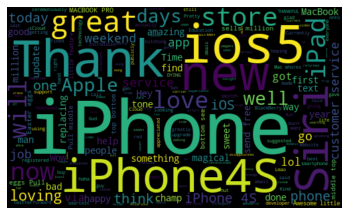

In [15]:
import matplotlib.pyplot as plt
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [17]:
X['Analysis']= X['Polarity'].apply(getAnalysis)

In [18]:
X

,Tweets,Subjectivity,Polarity,Analysis
0,Now all has to do is get swype on the iphone ...,0.000000,0.000000,Neutral
1,will be adding more carrier support to the iP...,0.500000,0.500000,Positive
2,Hilarious video - guy does a duet with 's Si...,0.700000,0.393750,Positive
3,you made it too easy for me to switch to iPh...,0.833333,0.541667,Positive
4,I just realized that the reason I got into twi...,0.200000,0.200000,Positive
...,...,...,...,...
95,I must admit has made me a very happy camper!...,0.850000,1.000000,Positive
96,"Day305, I'm thankful for the great customer se...",0.602273,0.468182,Positive
97,S/O to for replacing my phone for free,0.000000,0.000000,Neutral
98,Loving the new iPod update,0.702273,0.368182,Positive


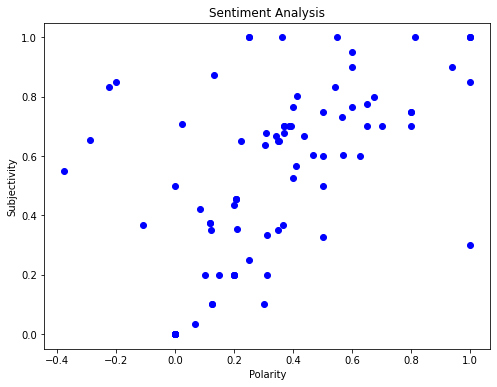

In [24]:
plt.figure(figsize=(8,6))
for i in range(X.shape[0]):
    plt.scatter(X['Polarity'][i], X['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [31]:
ptweets= X[X['Analysis'] == 'Positive']
ptweets= ptweets.shape[0]
ptweets_perc= round((ptweets/ X.shape[0]) * 100, 1)
ptweets_perc

72.0

In [33]:
X['Analysis'].value_counts()

Positive    72
Neutral     23
Negative     5
Name: Analysis, dtype: int64

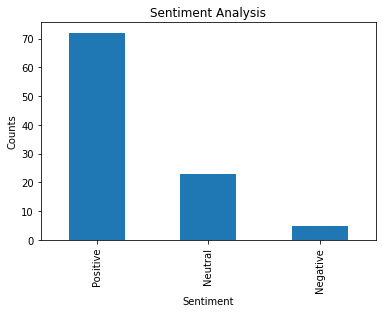

In [35]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
X['Analysis'].value_counts().plot(kind = 'bar')
plt.show()